# Summarizing metrics from SDT horizontal in plane lines

Leanne Friedrich 5/4/23

## initialization

In [1]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

In [2]:
import os
import sys
import numpy as np
sys.path.append("../")
sys.path.append("../../")
from py.tools.config import cfg
import py.tools.logs as logs
from plainIm import plainIm
import py.metrics.m_plot.m_plots as mp
import py.metrics.m_SDT as me
import regression as rg
import matplotlib.cm as cm
import py.file.file_handling as fh
LOGGERDEFINED = logs.openLog('summary_under_SDT.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

# initialize object to hold data

In [3]:
# get an object that holds summary data for all files
ms = me.summarySDT(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'underSDTSummaries.csv')
                             , diag=True)

Independents: 
	 meta        :  bn, calibFile, fluFile, printFolderR
	                date
	 meta sup    :  sup_base, sup_days, sup_dye, sup_rheModifier, sup_shortname, sup_surfactant, sup_surfactantWt, sup_type, sup_var
	 meta ink    :  ink_base, ink_days, ink_dye, ink_rheModifier, ink_shortname, ink_surfactant, ink_surfactantWt, ink_type, ink_var
	 const       :  GaRatio, GdRatio, gname, GtaRatio, int_Ca, int_CaInv, int_Re, ReRatio, tau0aRatio, tau0dRatio, tGdRatio, viscRatio, vRatio
	                dEst, hDragP, pressureCh0, rGrava, rGravd, sigma, spacing, spacing_adj, vDragP, zdepth
	 const sup   :  sup_Bma, sup_Bmd, sup_Ca, sup_CaInv, sup_diluent, sup_diluentWt, sup_dnorma, sup_dnorma_adj, sup_dnormd, sup_dnormd_adj, sup_dnormInva, sup_dnormInvd, sup_Oh, sup_OhInv, sup_Re, sup_We, sup_WeInv
	                sup_density, sup_dPRa, sup_dPRd, sup_eta0a, sup_eta0d, sup_Gstora, sup_Gstord, sup_rate, sup_tau0a, sup_tau0d, sup_v, sup_val, sup_visc0
	 const ink   :  ink_Bma, ink_Bmd, ink

,1,2,3
wp,X_w1p,X_w2p,X_w3p
wo,X_w1o,X_w2o,X_w3o
dw/dt,dXdt_w1o,dXdt_w2o,dXdt_w3o
wrelax,delta_X_w1relax,delta_X_w2relax,delta_X_w3relax
write,delta_X_write1,delta_X_write2,
dp,X_d1p,X_d2p,
do,X_d1o,X_d2o,
dd/dt,dXdt_d1o,dXdt_d2o,
drelax,delta_X_d1relax,delta_X_d2relax,
disturb,delta_X_disturb1,delta_X_disturb2,


# dependent variable correlations

In [121]:
# export correlations between dependent variables
ms.depCorrelations(os.path.join(cfg.path.fig, 'SDT', 'summaries', 'UnderSDTCorrs.csv'))

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\SDT\summaries\UnderSDTCorrs.csv


In [122]:
# plot the correlation between two dependent variables
ms.depCorrelation('space_b_w2p', 'roughness_w2o', plot=True)

{'var1': 'space_b_w2p',
 'var2': 'roughness_w2o',
 'spearman_corr': 0.8207997889245227,
 'spearman_p': 2.3578294837575426e-117}

# qualitative plots

In [ ]:
cvl = mp.qualityScatter(ms, ms.ss, xvar='int_Ca', yvar='spacing_adj', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook')

In [ ]:
cvlw1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1w1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

In [ ]:
cvld1 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='meanT_w1o', cvar0='l1d1', dx=0.05, dy=0.05, logx=True, logy=False, plotType='notebook', figsize=(14,6))

In [ ]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

In [ ]:
qsw1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', '', y0var='spacing_adj', cvar0='l1w1', simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsw1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w1_HIP'))

In [ ]:
qsd1 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1d1', simplify=True, logx=True, plotType='paper', figsize=(4,5))
qsd1.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d1_HIP'))

In [ ]:
qsw2 = mp.qualityScatterSimple(ms, ms.ss, 'sup_dnormd_adj', 'spacing_adj', cvar0='l1w2', simplify=False, logx=True, plotType='paper', figsize=(4,5))
qsw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_HIP'))

In [ ]:
qsd2 = mp.qualityScatterXY(ms, ms.ss, [['sup_dnormd_adj']], [['spacing_adj']], cvar='l1w3', simplify=False, logx=True, plotType='paper', figsize=(4,5))

In [ ]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w2'
                            , dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))
cvlw2.axs[0,0].set_ylim([0.4, 2.6])
cvlw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2_HIP_spacing'))

In [ ]:
cvlw2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w2w3'
                            , dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))
cvlw2.axs[0,0].set_ylim([0.4, 2.6])
cvlw2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w2w3_HIP_spacing'))

In [ ]:
cvld2 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1d2', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

In [ ]:
cvld2.axs[0,0].set_ylim([0.4, 2.6])
cvld2.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1d2_HIP_spacing'))

In [ ]:
cvlw3 = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w3', dx=0.05, dy=0.05, logx=True, logy=True, simplify=False, plotType='paper', figsize=(12,5))
cvlw3.axs[0,0].set_ylim([0.4, 2.6])

In [ ]:
cvlw3.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w3_HIP_spacing'))

In [ ]:
cvlw3e = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd_adj', yvar='ink_dnormd_adj', cvar0='l1w3end', dx=0.05, dy=0.05, logx=True, logy=True, plotType='paper', figsize=(12,5))

cvlw3e.axs[0,1].set_ylim([3*10**-4, 3*10**-1])
cvlw3e.axs[0,1].set_yticks([10**-3, 10**-2, 10**-1])
cvlw3e.axs[0,1].set_xlim([4*10**-3, 2*10**0])
cvlw3e.axs[0,1].set_xticks([10**-2, 10**-1, 10**0])
cvlw3e.export(os.path.join(cfg.path.fig, 'SDT','plots', 'quality', 'l1w3end_HIP_spacing'))

In [ ]:
cvlw3i = mp.qualityScatterSpacing(ms, ms.ss, xvar='sup_dnormd', yvar='ink_dnormd', cvar0='l1w2w3', dx=0.05, dy=0.05, logx=True, logy=True, plotType='notebook', figsize=(14,6))

# quantitative plots

In [ ]:
# plot a variable across many steps in the printing process
yvl = mp.yvarlines(ms, ms.ss, xvar='sup_dnormd', yvar='dwndt', cvar='sigma', llist=[1, 2, 3]
             , plist=['wo', 'do', 'disturb', 'write'], plotType='notebook', yideal=me.ideals()
                   , logx=True, logy=False, mode='scatter', dx=0.15)
yvl.fig

In [ ]:
# get a list of files that have measurements within a certain range
ms.reduceRows('delta_wn_disturb1', yvarmax=-0.3);

# export plots

In [ ]:
# plot shrinkage for single/double lines
yvl = mp.shrinkagePlot(ms, r'SDT\\PDMSS\\I_PDMSS12.5_S_3.00\\I_PDMSS12.5_S_3.00_230920\\disturbUnder_1_1.000', export=True)
yvl.fig

In [ ]:
# plot shrinkage for double/triple lines
yvl = mp.shrinkage3Plot(ms, 'HIP', export=True)
yvl.fig

In [ ]:
# plot vertical shifts for single/double lines
yvl = mp.shiftPlot(ms, 'HIP',  export=False)
yvl.fig

In [ ]:
# correlation between gap size and roughness
sp1 = mp.scatterPlot(ms, ms.ss, xvar='space_b_w2p', yvar='roughness_w2o', cvar='vRatio', logx=False, plotType='paper', figsize=(2.5, 2.5))
sp1.ax.set_xlabel('Gap during writing ($d_{est}$)')
sp1.ax.set_ylabel('Roughness after writing')
sp1.export(os.path.join(cfg.path.fig, 'SDT', 'plots', 'gap_roughness'))

In [ ]:
# plot gap size for disturbed lines
mp.gapPlot(ms, 'HIP', yvar='space_b_d1p', export=True).fig

In [ ]:
# plot gap size for pairs of lines
mp.gapPlot(ms, 'HIP', yvar='space_b_w2p', export=True).fig

In [ ]:
# plot fusion for single/double lines
mp.fusionPlot(ms, 'HIP', export=True).fig

In [ ]:
# plot fusion for double/triples lines
mp.fusion3Plot(ms, 'HIP', export=True).fig

# export regressions

In [ ]:
# export regression tables and relevant plots
def exportRegression(var, **kwargs) -> None:
    mp.regressionTableSDT(ms, ms.ss, var, logy=False, printOut=False,  package='tabularShort', trimVariables=False
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, tag='HIP', exportFolder=os.path.join(cfg.path.fig, 'SDT'), **kwargs)

In [ ]:
# shrinkage
exportRegression('dwndt_w1o')
exportRegression('delta_wn_disturb1')
exportRegression('dwndt_d1o')
exportRegression('delta_wn_write2')
exportRegression('dwndt_w2o')

exportRegression('delta_wn_disturb2')
exportRegression('dwndt_d2o')
exportRegression('delta_wn_write3')
exportRegression('dwndt_w3o')
exportRegression('ldiff_w2o')
exportRegression('ldiff_w3o')

In [ ]:
exportRegression('delta_y0_write2')

In [ ]:
# shifting
exportRegression('delta_y0_disturb1')
exportRegression('delta_y0_disturb1', spacing=1.25)
exportRegression('delta_y0_disturb1', Camax=1)
exportRegression('delta_y0_disturb2')
exportRegression('delta_y0_disturb2', spacing=1.25)

exportRegression('delta_yf_disturb1')
exportRegression('delta_yf_disturb1', spacing=0.5)
exportRegression('delta_yf_write2')
exportRegression('delta_yf_disturb2')
exportRegression('delta_yf_disturb2', spacing=0.5)
exportRegression('delta_yf_write3')

In [ ]:
exportRegression('roughness_w2o', spacing=0.875)

In [ ]:
# shifting
exportRegression('roughness_w2o')
exportRegression('roughness_w2o', spacing=1.25)

exportRegression('emptiness_w2o')
exportRegression('emptiness_w2o', spacing=0.875)
exportRegression('emptiness_w2o', spacing=1.25)

exportRegression('segments_w2o')
exportRegression('segments_w2o', spacing=1.25)

In [ ]:
# fusion 2
exportRegression('delta_roughness_write2')
exportRegression('delta_roughness_write2', spacing=1.25)
exportRegression('delta_roughness_disturb2')
exportRegression('delta_roughness_disturb2', spacing=1.25)
exportRegression('delta_roughness_write3')
exportRegression('delta_roughness_write3', spacing=1.25)

In [ ]:
# disturbed zone
# exportRegression('dy0lr_d1p')
# exportRegression('dy0lr_d1p', spacing=0.5)
# exportRegression('dy0lr_d1p', Camax=1)
# exportRegression('dy0lr_d2p')
# exportRegression('dy0lr_d2p', spacing=0.5)

# exportRegression('dyflr_d1p')
# exportRegression('dyflr_w2p')
# exportRegression('dyflr_d2p')
# exportRegression('dyflr_d2p', spacing=0.5)
# exportRegression('dyflr_w3p')

exportRegression('space_b_d1p')
exportRegression('space_b_d1p', spacing=1.25)
exportRegression('space_b_w2p')
exportRegression('space_b_w2p', spacing=1.25)

## wn

In [ ]:
xvl = mp.xvarlines(ms, ms.ss[ms.ss.vRatio==1], ['int_Ca', 'sup_dnormd', 'sup_Oh'], 'dwndt_w1o', 'sigma', logx=True, logy=False, plotType='paper')
xvl.export(os.path.join(cfg.path.fig, 'SDT', 'plots', 'shrinkage_sigma'))
xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w1o', logy=False, printOut=True,  package='pgfshort'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_wn_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca<1], 'delta_wn_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dwndt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_wn_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## ldiff

,variable,Spearman coeff,Spearman p
2,zdepth,0.31,1.2e-09


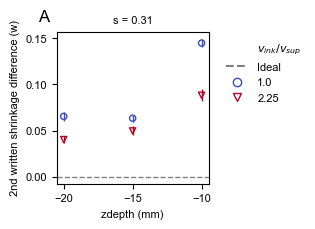

In [234]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.int_Ca>15], 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.52,2.5e-34
1,$\overline{d_{PR.sup.asc}}$,-0.53,1.9e-35
2,$\overline{d_{PR.sup.desc}}$,-0.51,2.6e-33


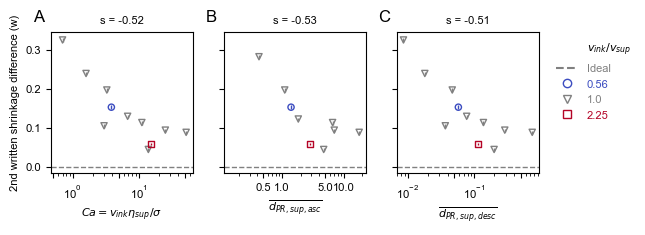

In [9]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.sup.asc}}$,-0.54,1.0e-19


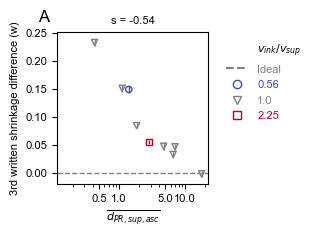

In [10]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'ldiff_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## meanT

In [ ]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'dmeanTdt_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=True, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
rgt.df

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,-0.65,1.8e-87
1,$Oh_{ink}/Oh_{sup}$,0.62,4.1e-75
2,$Re_{sup}$,0.73,1.1e-117
3,$Re_{ink}/Re_{sup}$,-0.68,4.5e-98
4,$\eta_{sup}$,-0.69,5.8e-101


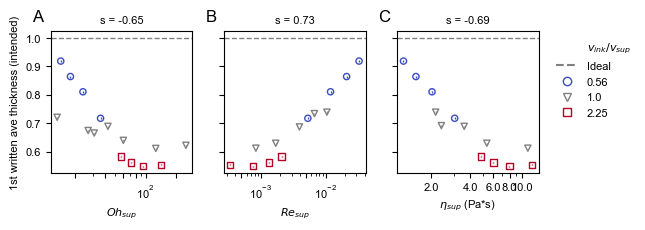

In [113]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.segments_w1o==1], 'meanT_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$\overline{d_{PR.sup.asc}}$,-0.35,3.5e-08


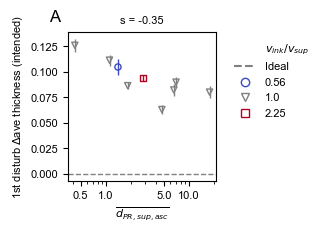

In [115]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_meanT_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## y0

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.63,1.6e-05
1,$\overline{d_{PR.sup.asc}}$,-0.72,1.4e-07
2,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,-0.66,4.4e-06
3,$\overline{d_{PR.ink.desc}}$,-0.67,2.3e-06
4,$\overline{d_{PR.sup.desc}}$,-0.66,4.4e-06
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.67,1.9e-06
6,$Oh_{sup}$,-0.67,2.1e-06
7,$Oh_{ink}\times Oh_{sup}$,-0.74,4.1e-08
8,$Re_{ink}\times Re_{sup}$,0.58,8.2e-05
9,$\eta_{ink}\times \eta_{sup}$,-0.57,1.2e-04


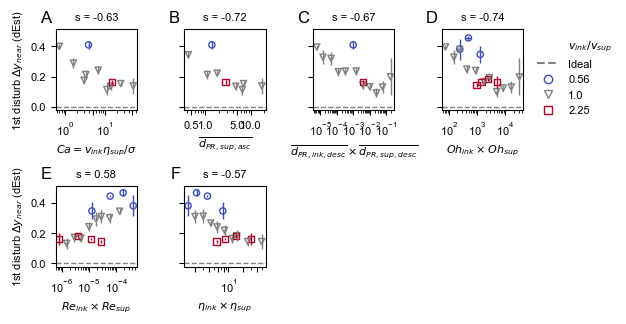

In [102]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_y0_disturb1', spacing=1.250, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$Oh_{ink}\times Oh_{sup}$,-0.45,7.5e-13


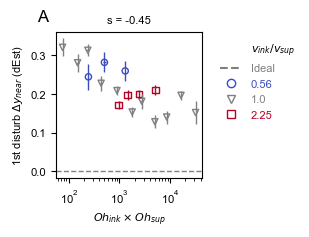

In [70]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_y0_disturb1',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.83,2.2e-05
1,adjusted spacing,0.84,1.3e-05


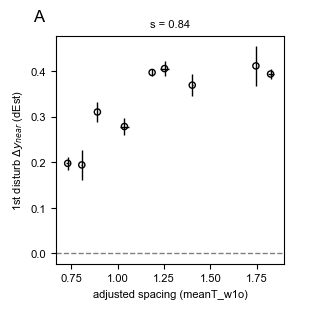

In [68]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_y0_disturb1', Camax=1, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Re_{sup}$,0.56,1.7e-20
1,$Re_{ink}\times Re_{sup}$,0.54,7.2e-19
2,$Bm_{sup.desc}$,-0.51,2.0e-16
3,$\eta_{sup}$,-0.55,7.0e-20
4,$\eta_{ink}\times \eta_{sup}$,-0.50,2.7e-16


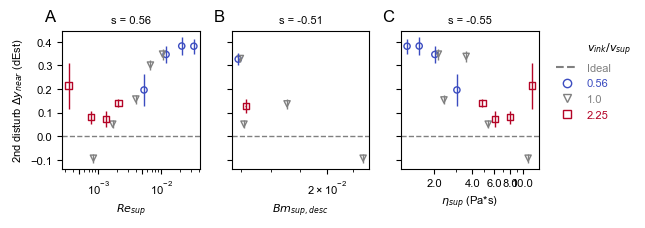

In [71]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_y0_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,adjusted spacing,-0.54,4.5e-04
1,$Oh_{sup}$,-0.65,8.1e-06
2,$Re_{ink}\times Re_{sup}$,0.73,1.4e-07
3,$\eta_{ink}\times \eta_{sup}$,-0.74,9.1e-08


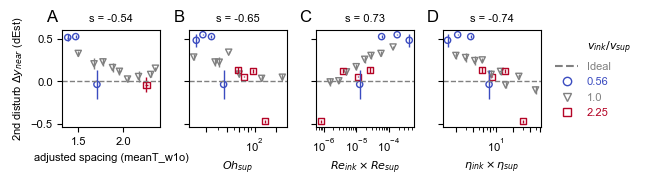

In [74]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_y0_disturb2', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## yc

,variable,Spearman coeff,Spearman p
0,spacing_adj,-0.54,4.3e-04
1,$Ca$,-0.56,1.8e-04
2,$\overline{d_{PR.sup.asc}}$,-0.64,1.4e-05
3,$\overline{d_{PR.sup.desc}}$,-0.62,2.3e-05
4,$Oh_{sup}$,-0.75,3.3e-08
5,$Re_{sup}$,0.63,1.6e-05
6,$Re_{ink}\times Re_{sup}$,0.63,1.5e-05
7,$Bm_{sup.desc}$,-0.50,1.2e-03
8,$\eta_{sup}$,-0.60,5.2e-05
9,$\eta_{ink}\times \eta_{sup}$,-0.57,1.4e-04


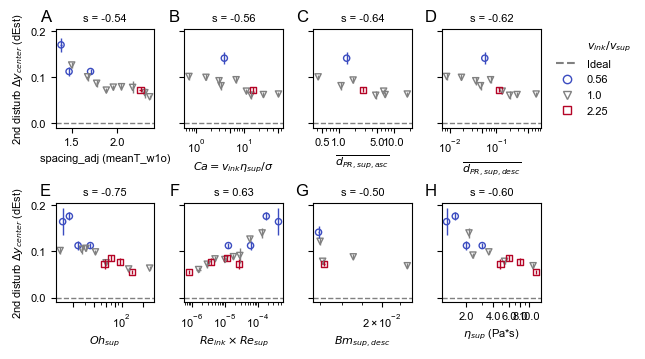

In [40]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb2', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,-0.52,1.6e-17
1,$Re_{sup}$,0.51,4.3e-17
2,$Bm_{sup.desc}$,-0.54,5.8e-19


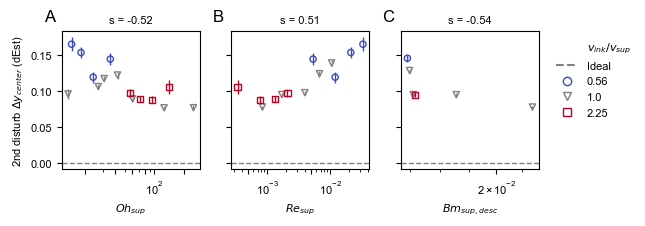

In [46]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.63,7.5e-55
1,spacing_adj,0.61,2.9e-50


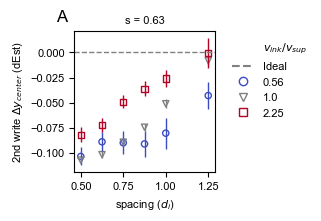

In [147]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write2',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Ca$,-0.54,3.0e-04
1,$Ca_{sup}$,-0.54,3.0e-04
2,$Ca_{ink}\times Ca_{sup}$,-0.56,1.5e-04
3,$\overline{d_{PR.sup.asc}}$,-0.61,3.3e-05
4,$\overline{d_{PR.sup.desc}}$,-0.61,3.3e-05
5,$\overline{d_{PR.ink.desc}}\times \overline{d_...,-0.61,3.4e-05
6,$Oh_{sup}$,-0.62,1.8e-05
7,$Oh_{ink}\times Oh_{sup}$,-0.67,2.2e-06
8,$\eta_{ink}\times \eta_{sup}$,-0.53,3.8e-04


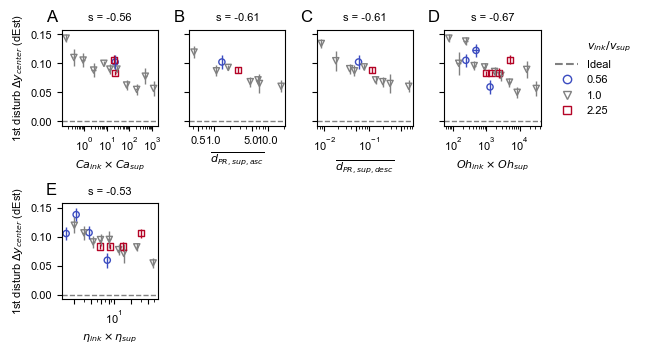

In [33]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_disturb1', spacing=1.250, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
3,$Re_{ink}/Re_{sup}$,0.47,2.0e-03


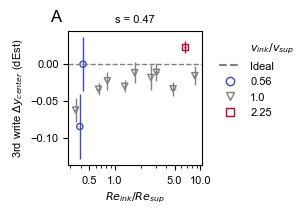

In [52]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yc_write3', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## yf

,variable,Spearman coeff,Spearman p
0,$Ca$,0.51,1.3e-03
1,$We_{ink}$,0.61,6.1e-05


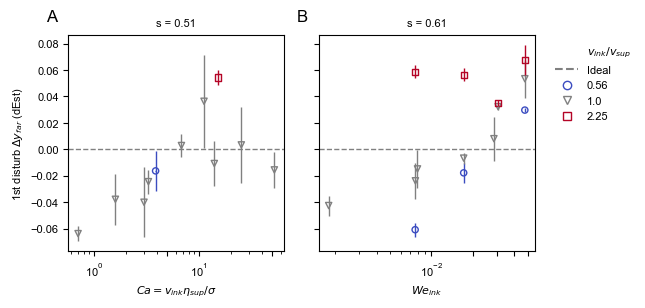

In [120]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_disturb1', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.31,1.6e-06


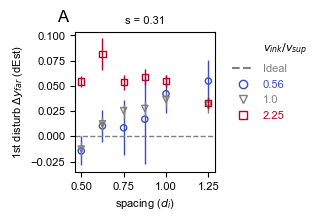

In [75]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}$,0.28,3.8e-10


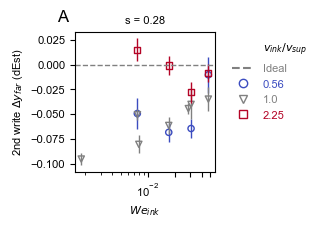

In [81]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Re_{sup}$,0.35,6.7e-08


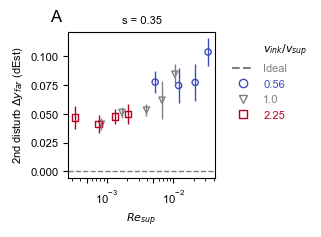

In [87]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Oh_{ink}/Oh_{sup}$,0.51,9.8e-04
1,$Re_{sup}$,0.59,6.5e-05
2,$Re_{ink}/Re_{sup}$,-0.54,4.2e-04
3,$Bm_{sup.desc}$,-0.56,2.2e-04
4,$\eta_{sup}$,-0.54,4.2e-04
5,$\eta_{ink}/\eta_{sup}$,0.51,9.7e-04


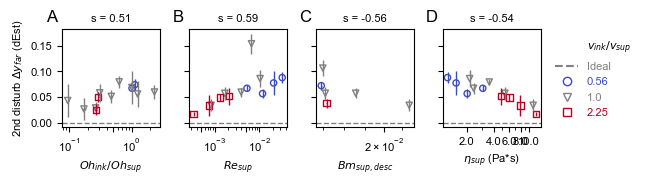

In [91]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_disturb2', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Bm_{sup.asc}$,-0.19,3.2e-03


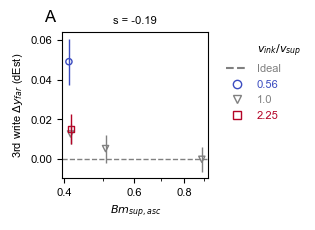

In [97]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_yf_write3',logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## dy0lr

,variable,Spearman coeff,Spearman p
0,$Bm_{ink.desc}$,-0.30,2.5e-06


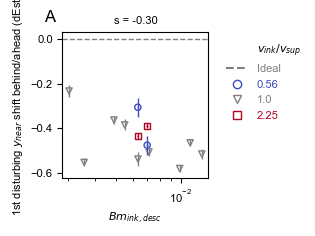

In [100]:
rgt = mp.regressionTableSDT(ms, ms.ss,'dy0lr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}/We_{sup}$,-0.56,3.2e-04


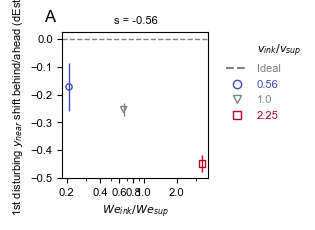

In [104]:
rgt = mp.regressionTableSDT(ms, ms.ss,'dy0lr_d1p', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,-0.85,8.1e-06
1,adjusted spacing,-0.86,4.8e-06


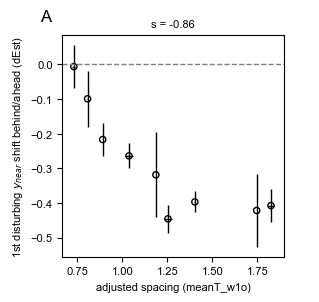

In [99]:
rgt = mp.regressionTableSDT(ms, ms.ss,'dy0lr_d1p', Camax=1, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Bm_{ink.desc}$,-0.32,4.3e-07


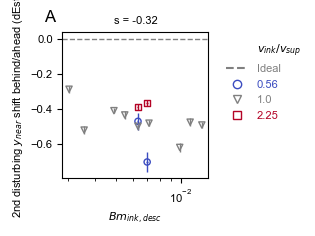

In [101]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dy0lr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}/We_{sup}$,-0.51,1.0e-03


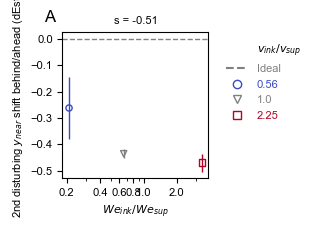

In [102]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dy0lr_d2p', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## dyflr

,variable,Spearman coeff,Spearman p
0,adjusted spacing,0.53,2.6e-18
1,$We_{ink}/We_{sup}$,0.53,1.3e-18


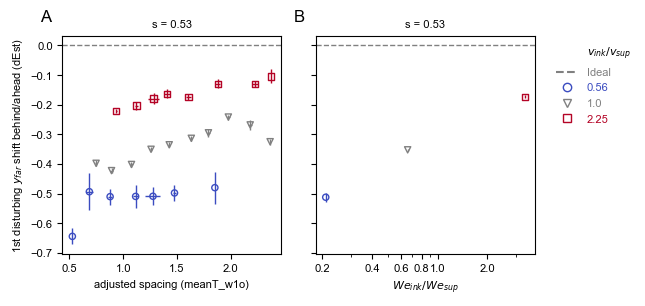

In [105]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d1p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}/We_{sup}$,0.50,1.2e-31


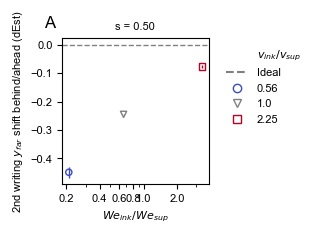

In [162]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.71,5.2e-37


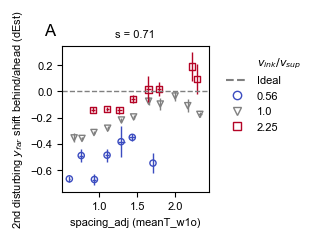

In [142]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$We_{ink}/We_{sup}$,0.58,1.0e-04
1,$Re_{sup}$,-0.54,3.5e-04
2,$Re_{ink}/Re_{sup}$,0.57,1.5e-04


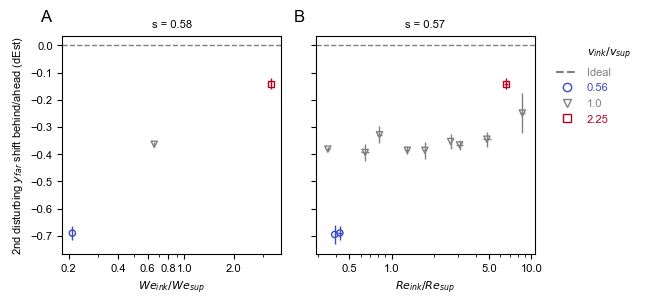

In [108]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_d2p', spacing=0.5, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.56,3.7e-21
1,spacing_adj,0.61,1.2e-26


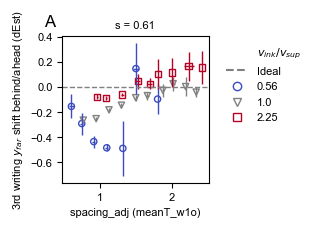

In [149]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'dyflr_w3p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## space_b

In [112]:
ms.depCorrelation('space_b_d1p', 'meanT_w1o')

{'spearman_corr': -0.3587326349453734,
 'spearman_p': 1.5186992169149137e-08,
 'var1': 'meanT_w1o',
 'var2': 'space_b_d1p'}

In [113]:
ms.depCorrelation('space_b_w2p', 'meanT_w1o')

{'spearman_corr': -0.3253047929522929,
 'spearman_p': 3.4000111559204935e-13,
 'var1': 'meanT_w1o',
 'var2': 'space_b_w2p'}

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.79,2.3e-51


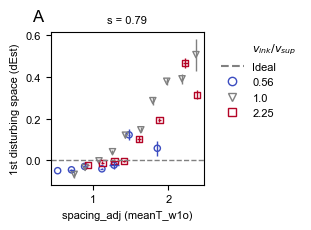

In [135]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p',  logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,adjusted spacing,0.14,0.13


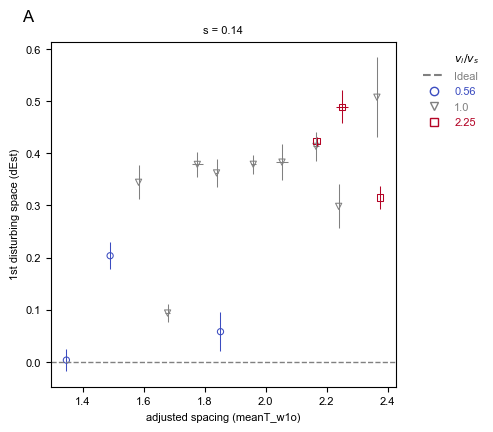

In [118]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p', spacing=1.25, logy=False, printOut=False,  package='pgfplot', trimVariables=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,adjusted spacing,0.55,2.7e-04
1,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.56,1.8e-04
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.59,5.3e-05


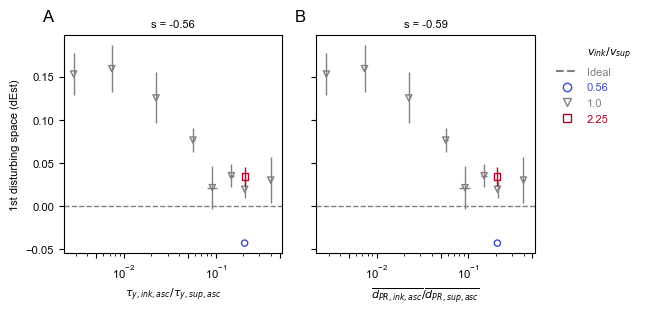

In [110]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d1p', spacing=0.875, logy=False, printOut=False,  package='pgfplot', trimVariables=True
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.77,4.3e-95


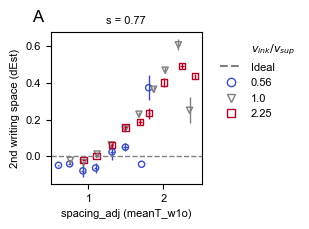

In [165]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.51,1.1e-06
1,$Oh_{sup}$,0.53,3.2e-07
2,$Re_{sup}$,-0.58,2.0e-08
3,$\eta_{sup}$,0.53,4.7e-07


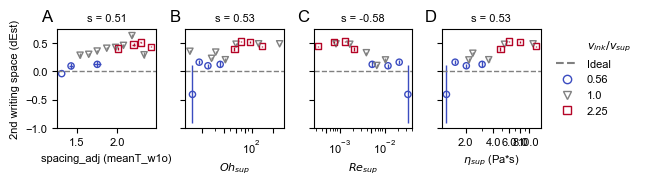

In [174]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_b_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.62,1.1e-09
1,$Ca$,0.52,9.9e-07
2,$\overline{d_{PR.sup.asc}}$,0.51,2.0e-06
3,$\overline{d_{PR.sup.desc}}$,0.52,8.9e-07
4,$Oh_{sup}$,0.70,8.1e-13
5,$Re_{sup}$,-0.68,3.7e-12
6,$\eta_{sup}$,0.66,3.2e-11
7,$\eta_{ink}\times \eta_{sup}$,0.61,2.1e-09


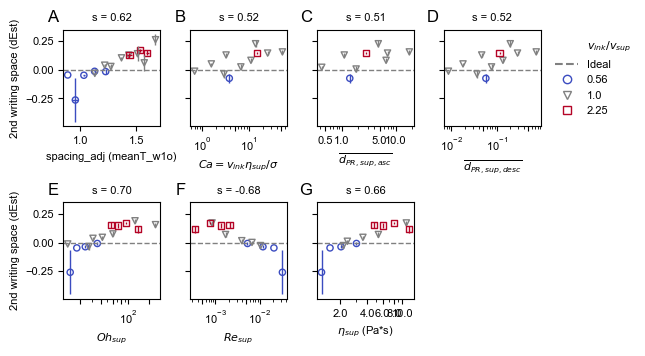

In [169]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'space_b_w2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.52,8.9e-04
1,$Oh_{sup}$,0.58,1.4e-04
2,$Re_{sup}$,-0.58,1.4e-04
3,$\eta_{sup}$,0.55,3.2e-04


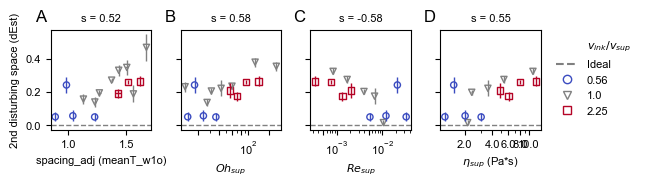

In [175]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.66,4.9e-06
1,$Oh_{sup}$,0.66,5.4e-06
2,$Oh_{ink}/Oh_{sup}$,-0.63,2.0e-05
3,$Re_{sup}$,-0.73,1.2e-07
4,$Re_{ink}/Re_{sup}$,0.66,4.9e-06
5,$\eta_{sup}$,0.71,3.3e-07


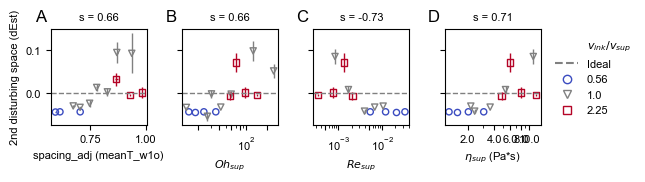

In [177]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Oh_{sup}$,0.45,4.4e-03


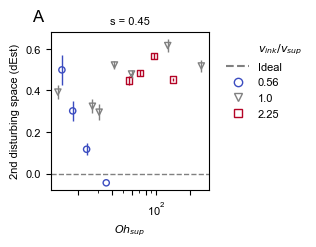

In [178]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.79,8.7e-50


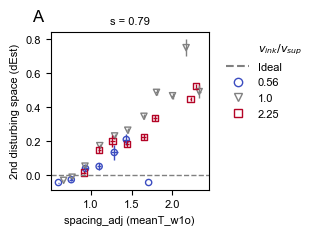

In [179]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'space_b_d2p', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## segments

,variable,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,-0.10,7.0e-03


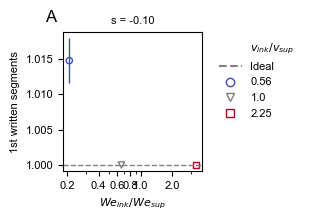

In [108]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
3,$We_{ink}/We_{sup}$,-0.24,2.4e-04


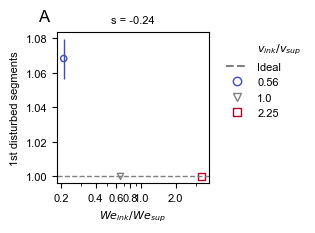

In [109]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_d1o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.59,7.3e-47
1,spacing_adj,0.59,2.1e-46


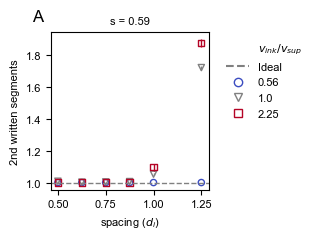

In [183]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.60,3.0e-09
1,$Oh_{sup}$,0.53,5.2e-07


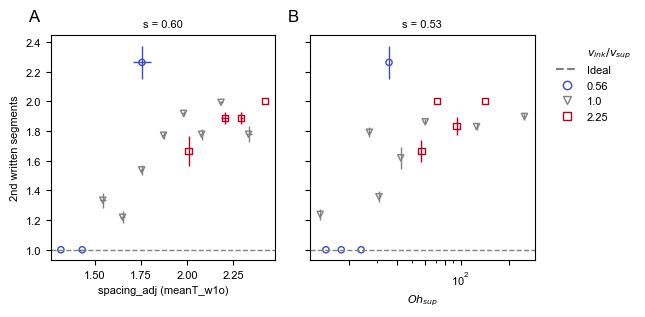

In [103]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$Bm_{ink.asc}\times Bm_{sup.asc}$,0.23,4.1e-02


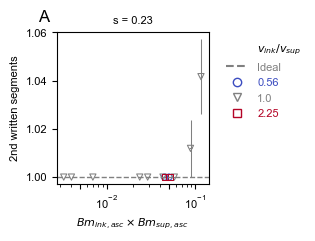

In [15]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'segments_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.53,5.6e-18


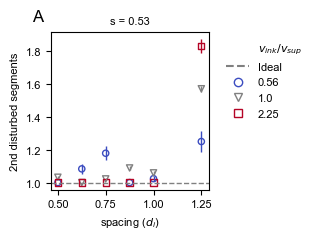

In [104]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.50,1.2e-03


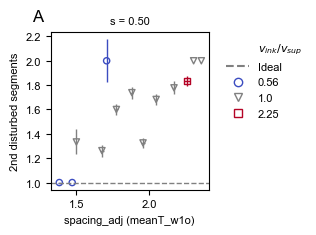

In [105]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'segments_d2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.64,3.7e-29
1,spacing_adj,0.64,4.4e-30


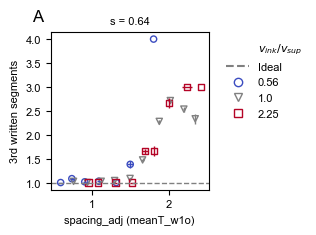

In [106]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'segments_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.67,1.4e-06
1,$Oh_{sup}$,0.54,3.1e-04
2,$Oh_{ink}\times Oh_{sup}$,0.55,1.9e-04


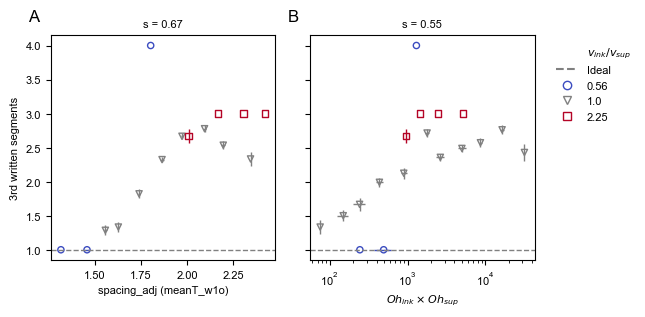

In [107]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'segments_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## emptiness

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.sup.asc}}$,-0.53,4.7e-04
1,$Oh_{sup}$,-0.54,3.3e-04
2,$Oh_{ink}\times Oh_{sup}$,-0.52,5.7e-04


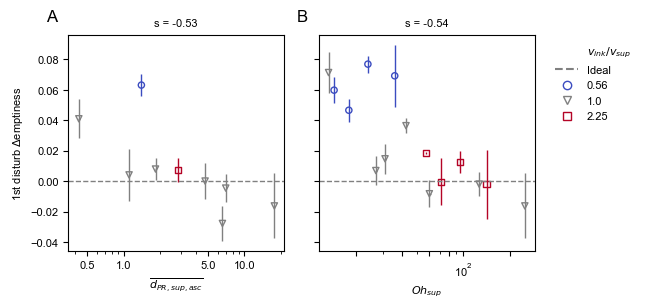

In [82]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$Oh_{sup}$,0.55,1.3e-07


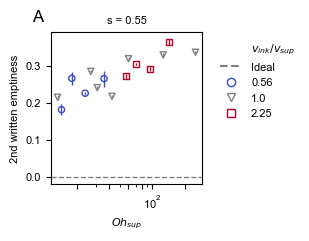

In [83]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'emptiness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,adjusted spacing,0.34,1.2e-14


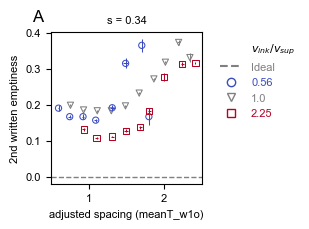

In [6]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,$Bm_{sup.desc}$,0.42,1.1e-04


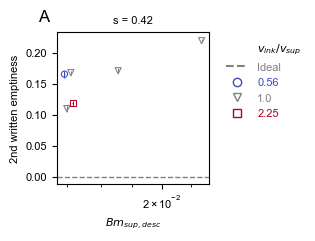

In [16]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'emptiness_w2o', spacing=0.875, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
1,spacing_adj,0.42,1.9e-21


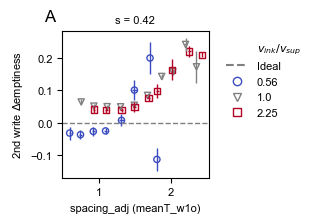

In [94]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_emptiness_write2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$Re_{ink}\times Re_{sup}$,0.49,1.4e-03


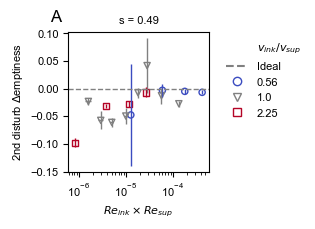

In [96]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing_adj,0.48,1.4e-03


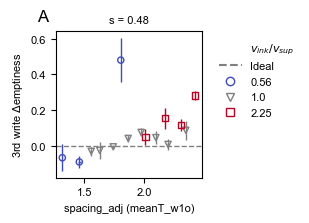

In [99]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_emptiness_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

## roughness

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.ink.desc}}$,-0.29,6.8e-02


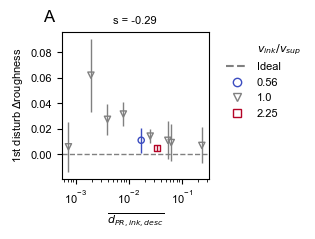

In [106]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_roughness_disturb1', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.82,7.4e-115
1,spacing_adj,0.86,1.3e-142


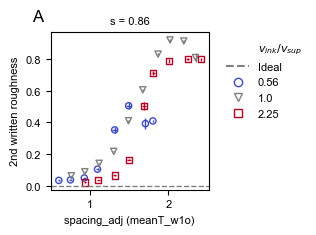

In [109]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.52,9.2e-07
1,$\overline{d_{PR.sup.asc}}$,0.52,8.8e-07
2,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.52,6.6e-07
3,$Oh_{sup}$,0.54,2.0e-07


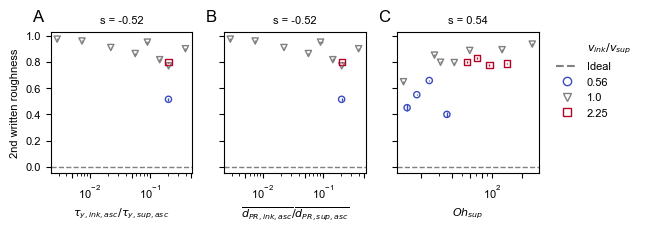

In [110]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.53,4.4e-07
1,$\overline{d_{PR.ink.asc}}/\overline{d_{PR.sup...,-0.51,1.6e-06


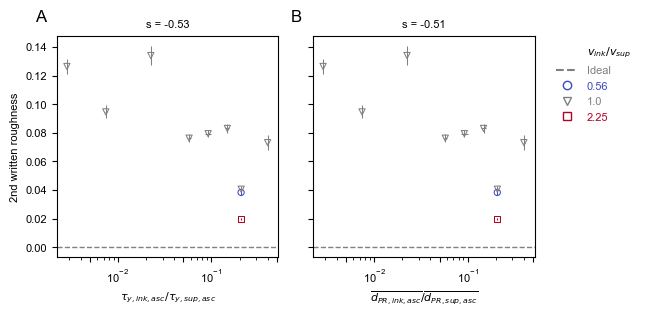

In [18]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.5], 'roughness_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,$\overline{d_{PR.sup.asc}}$,0.52,6.4e-04
1,$\overline{d_{PR.ink.asc}}\times \overline{d_{...,0.54,3.7e-04
2,$\overline{d_{PR.ink.desc}}$,0.52,6.3e-04
3,$\overline{d_{PR.ink.desc}}\times \overline{d_...,0.52,6.6e-04
4,$Oh_{ink}\times Oh_{sup}$,0.61,3.1e-05
5,$Re_{ink}\times Re_{sup}$,-0.50,1.1e-03
6,$\eta_{ink}$,0.51,9.0e-04
7,$\eta_{ink}\times \eta_{sup}$,0.52,7.3e-04


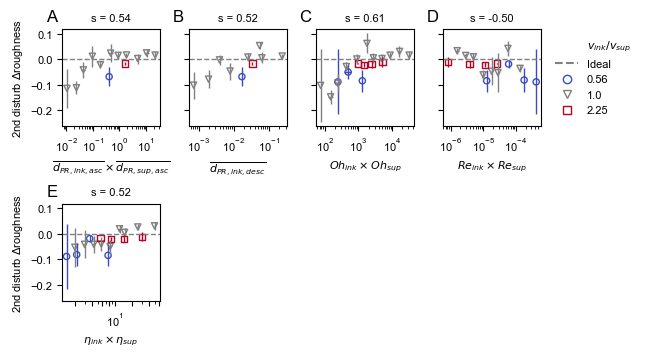

In [111]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'delta_roughness_disturb2', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
0,spacing,0.84,5.0e-66
1,spacing_adj,0.88,3.0e-80


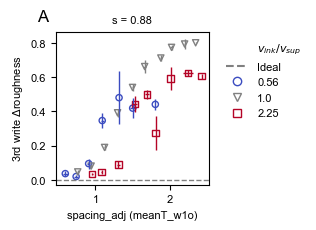

In [120]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write3', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p


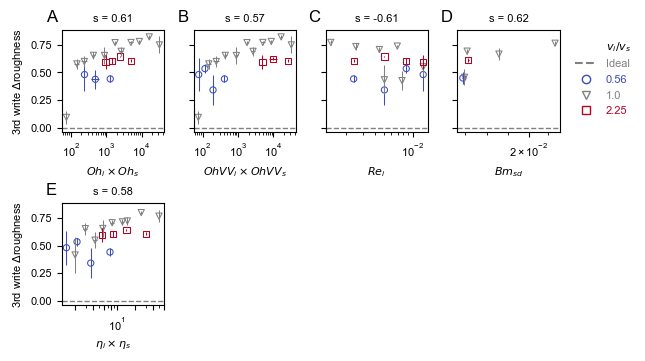

In [7]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'delta_roughness_write3', spacing=1.25, logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
5,$\tau_{y.ink.asc}/\tau_{y.sup.asc}$,-0.34,2.8e-02


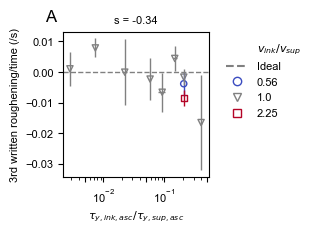

In [126]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==0.875], 'droughnessdt_w3o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$\eta_{ink}\times \eta_{sup}$,0.45,2.7e-05


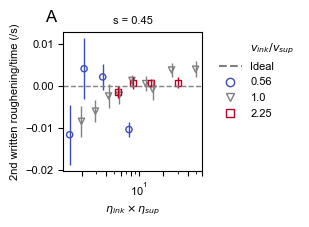

In [129]:
rgt = mp.regressionTableSDT(ms, ms.ss[ms.ss.spacing==1.25], 'droughnessdt_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig

,variable,Spearman coeff,Spearman p
2,$Ca_{sup}$,0.19,2.2e-05


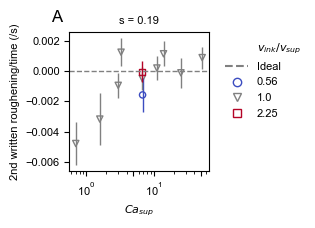

In [130]:
rgt = mp.regressionTableSDT(ms, ms.ss, 'droughnessdt_w2o', logy=False, printOut=False,  package='pgfplot'
                            , plot=True, yideal=me.ideals(), plotType='paper', export=False, exportFolder=os.path.join(cfg.path.fig, 'SDT'))
display(rgt.df)
rgt.xvl.fig